In [ ]:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
import findspark
findspark.init()

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/LDS9_K265_TranHoangBach/Week_2'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LDS9_K265_TranHoangBach/Week_2


In [ ]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import Row, SQLContext, SparkSession
sc = SparkContext(master="local", appName="New Spark Context")
spark = SparkSession(sc)
sqlcontext = SQLContext(sc)

In [ ]:
lst = [('John', 10), ('Lyna', 9), ('Samantha', 8), ('Tony', 10)]
rdd = sc.parallelize(lst)
people = rdd.map(lambda x: Row(name=x[0], marks=int(x[1])))
schema_people = sqlcontext.createDataFrame(people)
schema_people

DataFrame[marks: bigint, name: string]

In [ ]:
schema_people.show()

+-----+--------+
|marks|    name|
+-----+--------+
|   10|    John|
|    9|    Lyna|
|    8|Samantha|
|   10|    Tony|
+-----+--------+



In [ ]:
file_name = 'hdfs://bigdata.laptrinhpython.net:19000/people.csv'
people = spark.read.csv(file_name, inferSchema = True, header = True)
people.show(5)

+---+---------+--------------+------+-------------+
|_c0|person_id|          name|   sex|date of birth|
+---+---------+--------------+------+-------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|
|  1|      101| David Anthony|  male|   1971-10-14|
|  2|      102|     Ida Shipp|female|   1962-05-24|
|  3|      103|  Joanna Moore|female|   2017-03-10|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|
+---+---------+--------------+------+-------------+
only showing top 5 rows



In [ ]:
people

DataFrame[_c0: int, person_id: int, name: string, sex: string, date of birth: string]

In [ ]:
spark = SparkSession(sc)
file_name = 'hdfs://bigdata.laptrinhpython.net:19000/data.json'
people = spark.read.json(file_name)
people.show(5)

+----------+--------------------+-------------+--------------------+--------------------+-------------------+
|        id|            location|sampling_rate|              sensor|    sensordatavalues|          timestamp|
+----------+--------------------+-------------+--------------------+--------------------+-------------------+
|5810744647|[112.6, FR, 0, 11...|         null|[22349, 1, [14, N...|[[12340422762, 1....|2019-12-20 03:22:01|
|5810744646|[35.2, DE, 0, 107...|         null|[21149, 7, [9, va...|[[12340422760, 9....|2019-12-20 03:22:01|
|5810744645|[51.0, DE, 0, 293...|         null|[5811, 1, [14, No...|[[12340422757, 6....|2019-12-20 03:22:01|
|5810744644|[34.4, BE, 0, 441...|         null|[8765, 1, [14, No...|[[12340422756, 3....|2019-12-20 03:22:01|
|5810744643|[5.0, FR, 0, 1100...|         null|[21693, 1, [14, N...|[[12340422754, 7....|2019-12-20 03:22:01|
+----------+--------------------+-------------+--------------------+--------------------+-------------------+
only showi

In [ ]:
people.printSchema()

root
 |-- id: long (nullable = true)
 |-- location: struct (nullable = true)
 |    |-- altitude: string (nullable = true)
 |    |-- country: string (nullable = true)
 |    |-- exact_location: long (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- indoor: long (nullable = true)
 |    |-- latitude: string (nullable = true)
 |    |-- longitude: string (nullable = true)
 |-- sampling_rate: string (nullable = true)
 |-- sensor: struct (nullable = true)
 |    |-- id: long (nullable = true)
 |    |-- pin: string (nullable = true)
 |    |-- sensor_type: struct (nullable = true)
 |    |    |-- id: long (nullable = true)
 |    |    |-- manufacturer: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |-- sensordatavalues: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- id: long (nullable = true)
 |    |    |-- value: string (nullable = true)
 |    |    |-- value_type: string (nullable = true)
 |-- timestamp: string (nullab

In [ ]:
df = spark.read.csv('data_day_3/Obesity_data.csv', inferSchema = True, header = True)
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- bmc: integer (nullable = true)
 |-- bmd: double (nullable = true)
 |-- fat: integer (nullable = true)
 |-- lean: integer (nullable = true)
 |-- pcfat: double (nullable = true)



In [ ]:
df.show(5)

+---+------+------+------+----+---+----+----+-----+-----+-----+
| id|gender|height|weight| bmi|age| bmc| bmd|  fat| lean|pcfat|
+---+------+------+------+----+---+----+----+-----+-----+-----+
|  1|     F|   150|    49|21.8| 53|1312|0.88|17802|28600| 37.3|
|  2|     M|   165|    52|19.1| 65|1309|0.84| 8381|40229| 16.8|
|  3|     F|   157|    57|23.1| 64|1230|0.84|19221|36057| 34.0|
|  4|     F|   156|    53|21.8| 56|1171| 0.8|17472|33094| 33.8|
|  5|     M|   160|    51|19.9| 54|1681|0.98| 7336|40621| 14.8|
+---+------+------+------+----+---+----+----+-----+-----+-----+
only showing top 5 rows



In [ ]:
df.count()

1217

In [ ]:
df.describe('gender', 'height', 'weight').show()

+-------+------+------------------+-----------------+
|summary|gender|            height|           weight|
+-------+------+------------------+-----------------+
|  count|  1217|              1217|             1217|
|   mean|  null| 156.7239112571898|55.14379622021364|
| stddev|  null|7.9777256820417035|9.404988688010084|
|    min|     F|               136|               34|
|    max|     M|               185|               95|
+-------+------+------------------+-----------------+



In [ ]:
df.describe().toPandas()

,summary,id,gender,height,weight,bmi,age,bmc,bmd,fat,lean,pcfat
0,count,1217,1217,1217,1217,1217,1217,1217,1217,1217,1217,1217
1,mean,614.518488085456,None,156.7239112571898,55.14379622021364,22.39539852095314,47.15201314708299,1724.9145439605588,1.0087428101889888,17288.436318816763,35463.1133935908,31.604785903401805
2,stddev,354.4705719473191,None,7.9777256820417035,9.404988688010084,3.0564419447471356,17.27550739904804,363.3490251436472,0.1131224610778956,5214.398664940806,7027.546493084218,7.182861527055848
3,min,1,F,136,34,14.5,13,695,0.65,4277,19136,9.2
4,max,1227,M,185,95,37.1,88,3040,1.35,40825,63059,48.4


In [ ]:
df_sub = df.select('id', 'gender', 'height', 'weight')
df_sub.show(5)

+---+------+------+------+
| id|gender|height|weight|
+---+------+------+------+
|  1|     F|   150|    49|
|  2|     M|   165|    52|
|  3|     F|   157|    57|
|  4|     F|   156|    53|
|  5|     M|   160|    51|
+---+------+------+------+
only showing top 5 rows



In [ ]:
df_sub.crosstab('height', 'gender').sort('height_gender').show()

+-------------+---+---+
|height_gender|  F|  M|
+-------------+---+---+
|          136|  1|  0|
|          137|  1|  0|
|          138|  2|  0|
|          139|  2|  0|
|          140|  7|  0|
|          141|  6|  0|
|          142| 11|  0|
|          143| 11|  0|
|          144| 13|  0|
|          145| 24|  0|
|          146| 20|  1|
|          147| 18|  0|
|          148| 35|  3|
|          149| 33|  0|
|          150| 95|  6|
|          151| 34|  1|
|          152| 54|  2|
|          153| 73|  1|
|          154| 45|  3|
|          155|104| 11|
+-------------+---+---+
only showing top 20 rows



In [ ]:
df_sub.crosstab('gender', 'height').show()

+-------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|gender_height|136|137|138|139|140|141|142|143|144|145|146|147|148|149|150|151|152|153|154|155|156|157|158|159|160|161|162|163|164|165|166|167|168|169|170|171|172|173|174|175|176|177|178|179|180|182|183|185|
+-------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|            M|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  1|  0|  3|  0|  6|  1|  2|  1|  3| 11|  6|  5| 14|  8| 33|  9| 23| 17| 17| 37| 13| 17| 30| 11| 24|  7| 12|  8|  2| 11|  4|  2|  8|  1|  4|  2|  1|  1|
|            F|  1|  1|  2|  2|  7|  6| 11| 11| 13| 24| 20| 18| 35| 33| 95| 34| 54| 73| 45|104| 45| 31| 53| 29| 45|  8| 19| 13| 11| 10|  0|  3|  4|  1|  1|  0|  0|  0| 

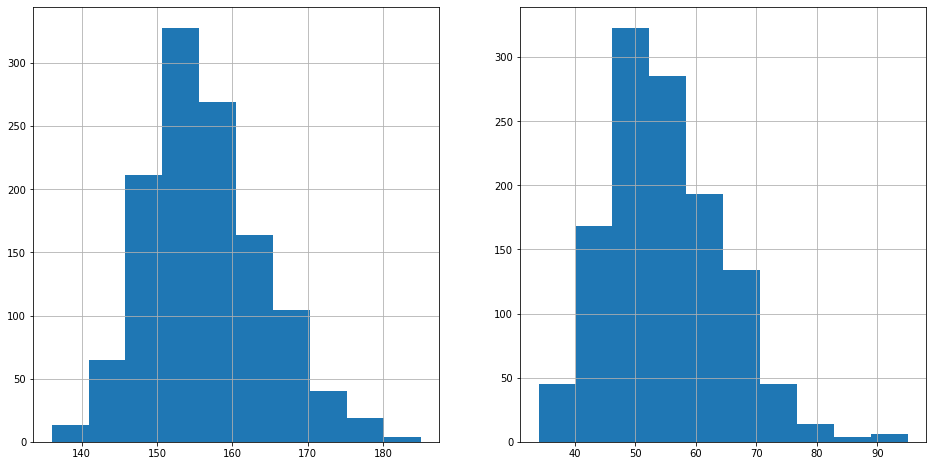

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

df_pd = df_sub.toPandas()
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
df_pd['height'].hist()
plt.subplot(1,2,2)
df_pd['weight'].hist()
plt.show()

In [ ]:
df_sub.groupby('gender').mean('weight').show()

+------+-----------------+
|gender|      avg(weight)|
+------+-----------------+
|     F|52.31090487238979|
|     M|62.02253521126761|
+------+-----------------+



In [ ]:
df_sub.groupby('gender').agg({'weight': 'count', 'height': 'count'}).show()

+------+-------------+-------------+
|gender|count(weight)|count(height)|
+------+-------------+-------------+
|     F|          862|          862|
|     M|          355|          355|
+------+-------------+-------------+



In [ ]:
df_sub.select('weight').distinct().count()

55

In [ ]:
df_sub.sort(df_sub.height.desc(), df_sub.weight.asc()).show()

+---+------+------+------+
| id|gender|height|weight|
+---+------+------+------+
|927|     M|   185|    91|
|634|     M|   183|    95|
|603|     M|   182|    70|
|768|     M|   182|    80|
|407|     M|   180|    60|
|309|     M|   180|    68|
|677|     M|   180|    75|
|462|     M|   180|    90|
|440|     M|   179|    69|
|531|     M|   178|    68|
|640|     M|   178|    68|
|691|     M|   178|    73|
|374|     M|   178|    75|
|708|     M|   178|    77|
|527|     M|   178|    79|
|911|     M|   178|    86|
|406|     M|   178|    93|
|664|     M|   177|    60|
|645|     M|   177|    80|
|320|     M|   176|    62|
+---+------+------+------+
only showing top 20 rows



In [ ]:
df_sub.orderBy(df_sub.height.desc(), df_sub.weight.asc()).show()

+---+------+------+------+
| id|gender|height|weight|
+---+------+------+------+
|927|     M|   185|    91|
|634|     M|   183|    95|
|603|     M|   182|    70|
|768|     M|   182|    80|
|407|     M|   180|    60|
|309|     M|   180|    68|
|677|     M|   180|    75|
|462|     M|   180|    90|
|440|     M|   179|    69|
|531|     M|   178|    68|
|640|     M|   178|    68|
|691|     M|   178|    73|
|374|     M|   178|    75|
|708|     M|   178|    77|
|527|     M|   178|    79|
|911|     M|   178|    86|
|406|     M|   178|    93|
|664|     M|   177|    60|
|645|     M|   177|    80|
|320|     M|   176|    62|
+---+------+------+------+
only showing top 20 rows



In [ ]:
df_new = df_sub.withColumn('bmi', (df_sub['weight']/(df_sub['height']/100)**2))
df_new.show(5)

+---+------+------+------+------------------+
| id|gender|height|weight|               bmi|
+---+------+------+------+------------------+
|  1|     F|   150|    49| 21.77777777777778|
|  2|     M|   165|    52|19.100091827364558|
|  3|     F|   157|    57|23.124670372023203|
|  4|     F|   156|    53|  21.7784352399737|
|  5|     M|   160|    51|19.921874999999996|
+---+------+------+------+------------------+
only showing top 5 rows



In [ ]:
df_new = df_new.withColumnRenamed('gender', 'sex')
df_new.show(5)

+---+---+------+------+------------------+
| id|sex|height|weight|               bmi|
+---+---+------+------+------------------+
|  1|  F|   150|    49| 21.77777777777778|
|  2|  M|   165|    52|19.100091827364558|
|  3|  F|   157|    57|23.124670372023203|
|  4|  F|   156|    53|  21.7784352399737|
|  5|  M|   160|    51|19.921874999999996|
+---+---+------+------+------------------+
only showing top 5 rows



In [ ]:
df_new.count()

1217

In [ ]:
df_new.dropna().count()

1217

In [ ]:
file_name = 'hdfs://bigdata.laptrinhpython.net:19000/people.csv'
people = spark.read.csv(file_name, inferSchema = True, header = True)
people.filter(people['name'].like('I%na%p')).show()

+---+---------+----+---+-------------+
|_c0|person_id|name|sex|date of birth|
+---+---------+----+---+-------------+
+---+---------+----+---+-------------+



In [ ]:
people.filter(people['name'].like('%na%')).count()

6075

In [ ]:
people.where(people['name'].contains('Moore')).show()

+----+---------+--------------+------+-------------+
| _c0|person_id|          name|   sex|date of birth|
+----+---------+--------------+------+-------------+
|   3|      103|  Joanna Moore|female|   2017-03-10|
| 430|      530| Richard Moore|  male|   1989-05-11|
| 484|      584|    Mary Moore|female|   1979-05-15|
| 528|      628|    Rose Moore|female|   1975-05-02|
| 659|      759|Nicholas Moore|  male|   1981-10-10|
|1163|     1263| Russell Moore|  male|   1991-12-08|
|1410|     1510|   Doris Moore|female|   1969-12-23|
|1463|     1563|  Claire Moore|female|  20175-02-28|
|1895|     1995|  George Moore|  male|   1974-01-10|
|2213|     2313|    Earl Moore|  male|   2003-05-08|
|2467|     2567|  Cheryl Moore|female|   1998-09-28|
|2652|     2752|  Sergio Moore|  null|   1972-06-24|
|2787|     2887| Darrell Moore|  male|   1986-09-04|
|3226|     3326| Marissa Moore|female|   2005-04-14|
|3524|     3624|   Jaime Moore|  male|   2011-02-28|
|3632|     3732|     Eva Moore|female|   1978-

In [ ]:
from pyspark.sql.functions import *
import time
tic = time.time()
people.withColumn('upper_name', upper(people['name'])).show(3)
toc = time.time()
print(toc-tic, 'seconds')

+---+---------+--------------+------+-------------+--------------+
|_c0|person_id|          name|   sex|date of birth|    upper_name|
+---+---------+--------------+------+-------------+--------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|PENELOPE LEWIS|
|  1|      101| David Anthony|  male|   1971-10-14| DAVID ANTHONY|
|  2|      102|     Ida Shipp|female|   1962-05-24|     IDA SHIPP|
+---+---------+--------------+------+-------------+--------------+
only showing top 3 rows

0.3976750373840332 seconds


In [ ]:
import time
tic = time.time()
people.withColumn('upper_name', upper(col('name'))).show(3)
toc = time.time()
print(toc-tic, 'seconds')

+---+---------+--------------+------+-------------+--------------+
|_c0|person_id|          name|   sex|date of birth|    upper_name|
+---+---------+--------------+------+-------------+--------------+
|  0|      100|Penelope Lewis|female|   1990-08-31|PENELOPE LEWIS|
|  1|      101| David Anthony|  male|   1971-10-14| DAVID ANTHONY|
|  2|      102|     Ida Shipp|female|   1962-05-24|     IDA SHIPP|
+---+---------+--------------+------+-------------+--------------+
only showing top 3 rows

0.37189197540283203 seconds


In [ ]:
from pyspark.sql.types import *
people = people.withColumn('year', substring('date of birth', pos=0, len=4)\
                  .cast(IntegerType()))
people.show(3)

+---+---------+--------------+------+-------------+----+
|_c0|person_id|          name|   sex|date of birth|year|
+---+---------+--------------+------+-------------+----+
|  0|      100|Penelope Lewis|female|   1990-08-31|1990|
|  1|      101| David Anthony|  male|   1971-10-14|1971|
|  2|      102|     Ida Shipp|female|   1962-05-24|1962|
+---+---------+--------------+------+-------------+----+
only showing top 3 rows



In [ ]:
people.filter(people['year']>=1989).count()

39593

In [ ]:
people.count()

100000

In [ ]:
df.select(*['id', 'height', 'weight'], when(df['height'] >= 150, 'tall').alias('type')).show()

+---+------+------+----+
| id|height|weight|type|
+---+------+------+----+
|  1|   150|    49|tall|
|  2|   165|    52|tall|
|  3|   157|    57|tall|
|  4|   156|    53|tall|
|  5|   160|    51|tall|
|  6|   153|    47|tall|
|  7|   155|    58|tall|
|  8|   167|    65|tall|
|  9|   165|    54|tall|
| 10|   158|    60|tall|
| 11|   155|    48|tall|
| 12|   165|    65|tall|
| 13|   155|    40|tall|
| 14|   158|    57|tall|
| 15|   154|    59|tall|
| 16|   150|    70|tall|
| 17|   150|    50|tall|
| 18|   158|    65|tall|
| 19|   162|    72|tall|
| 20|   161|    55|tall|
+---+------+------+----+
only showing top 20 rows



In [ ]:
df.select('height', when(df.height >= 160, 'tall').alias('type')).show(5)

+------+----+
|height|type|
+------+----+
|   150|null|
|   165|tall|
|   157|null|
|   156|null|
|   160|tall|
|   153|null|
|   155|null|
|   167|tall|
|   165|tall|
|   158|null|
|   155|null|
|   165|tall|
|   155|null|
|   158|null|
|   154|null|
|   150|null|
|   150|null|
|   158|null|
|   162|tall|
|   161|tall|
+------+----+
only showing top 20 rows



In [ ]:
df.select(*['height', 'weight']).when(df['height'] >= 160, 'tall')

In [ ]:
df.select('height', when(df['height'] <= 150, 'short')\
                    .when(df['height'] <= 165, 'medium')\
                    .otherwise('high')\
                    .alias('type')).show(10)

+------+------+
|height|  type|
+------+------+
|   150| short|
|   165|medium|
|   157|medium|
|   156|medium|
|   160|medium|
|   153|medium|
|   155|medium|
|   167|  high|
|   165|medium|
|   158|medium|
+------+------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import udf
def bmi_type(bmi):
    if bmi <= 18.5:
        return 'UnderWeight'
    elif bmi <= 24.9:
        return 'Normal weight'
    elif bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obesity'
bmi_func = udf(bmi_type, StringType())
df_new.withColumn('bmi_type', bmi_func(df_new['bmi'])).show(20)

+---+---+------+------+------------------+-------------+
| id|sex|height|weight|               bmi|     bmi_type|
+---+---+------+------+------------------+-------------+
|  1|  F|   150|    49| 21.77777777777778|Normal weight|
|  2|  M|   165|    52|19.100091827364558|Normal weight|
|  3|  F|   157|    57|23.124670372023203|Normal weight|
|  4|  F|   156|    53|  21.7784352399737|Normal weight|
|  5|  M|   160|    51|19.921874999999996|Normal weight|
|  6|  F|   153|    47| 20.07774787474903|Normal weight|
|  7|  F|   155|    58|24.141519250780433|Normal weight|
|  8|  M|   167|    65|23.306680053067517|Normal weight|
|  9|  M|   165|    54|19.834710743801654|Normal weight|
| 10|  F|   158|    60|24.034609838166958|Normal weight|
| 11|  F|   155|    48|19.979188345473464|Normal weight|
| 12|  M|   165|    65|23.875114784205696|Normal weight|
| 13|  F|   155|    40|16.649323621227886|  UnderWeight|
| 14|  M|   158|    57|22.832879346258608|Normal weight|
| 15|  F|   154|    59| 24.8777

In [ ]:
height = 172
weight = 75
my_bmi = weight/(height/100)**2
print(my_bmi)
print(bmi_type(my_bmi))

25.351541373715524
Overweight


In [ ]:
people.createOrReplaceTempView('people_view')

In [ ]:
query = 'SELECT * FROM people_view'
people_df = spark.sql(query)
people_df.show(5)

+---+---------+--------------+------+-------------+----+
|_c0|person_id|          name|   sex|date of birth|year|
+---+---------+--------------+------+-------------+----+
|  0|      100|Penelope Lewis|female|   1990-08-31|1990|
|  1|      101| David Anthony|  male|   1971-10-14|1971|
|  2|      102|     Ida Shipp|female|   1962-05-24|1962|
|  3|      103|  Joanna Moore|female|   2017-03-10|2017|
|  4|      104|Lisandra Ortiz|female|   2020-08-05|2020|
+---+---------+--------------+------+-------------+----+
only showing top 5 rows



In [ ]:
query = 'SELECT * FROM people_view WHERE sex=="female" '
people_df = spark.sql(query)
people_df.show(5)
print(people_df.count())

+---+---------+-----------------+------+-------------+----+
|_c0|person_id|             name|   sex|date of birth|year|
+---+---------+-----------------+------+-------------+----+
|  0|      100|   Penelope Lewis|female|   1990-08-31|1990|
|  2|      102|        Ida Shipp|female|   1962-05-24|1962|
|  3|      103|     Joanna Moore|female|   2017-03-10|2017|
|  4|      104|   Lisandra Ortiz|female|   2020-08-05|2020|
| 11|      111|Annabelle Rosseau|female|   1989-07-13|1989|
+---+---------+-----------------+------+-------------+----+
only showing top 5 rows

49014
